# Netflix

####  Importing libaries

In [ ]:
Import pandas as pd

#### Loading dataset

In [110]:
link="http://localhost:8888/edit/d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_000_940_original_netflix.csv"

In [111]:
df=pd.read_csv("d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_000_940_original_netflix.csv")

In [112]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


#### Descriptive statistics for the dataset

In [113]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


###### Information about the dataset

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


###### knowing the shape of the dataset

In [115]:
df.shape

(8807, 12)

### Missing values in the dataset ###

In [116]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Handling Missing Values using different strategies

#  Checking for duplicate rows in the dataset

In [117]:
df.duplicated().sum()

0

## Import numpy 

In [120]:
import numpy as np

# Replacing missing values in the 'director' column with 'No Data'

In [122]:
df['director'].replace(np.nan, 'No Data', inplace=True)

In [125]:
# Replacing missing values in the 'cast' column with 'No Data'

df['cast'].replace(np.nan, 'No Data', inplace=True)

In [126]:
## Filling missing values in the 'country' column with the mode value

df['country'] = df['country'].fillna(df['country'].mode()[0])

In [127]:
## Finding the mode rating for movies and TV shows

movie_rating = df.loc[df['type'] == 'Movie', 'rating'].mode()[0]
tv_rating = df.loc[df['type'] == 'TV Show', 'rating'].mode()[0]

In [128]:
## Filling missing rating values based on the type of content

df['rating'] = df.apply(lambda x: movie_rating if x['type'] == 'Movie' and pd.isna(x['rating'])
                        else tv_rating if x['type'] == 'TV Show' and pd.isna(x['rating'])
                        else x['rating'], axis=1)

In [129]:
## Finding the mode duration for movies and TV shows

movie_duration_mode = df.loc[df['type'] == 'Movie', 'duration'].mode()[0]
tv_duration_mode = df.loc[df['type'] == 'TV Show', 'duration'].mode()[0]

In [130]:
## Filling missing duration values based on the type of content

df['duration'] = df.apply(lambda x: movie_duration_mode if x['type'] == 'Movie' 
                          and pd.isna(x['duration'])
                          else tv_duration_mode if x['type'] == 'TV Show' 
                          and pd.isna(x['duration'])
                          else x['duration'], axis=1)

###### Dropping Remaining Missing Values

# Dropping rows with missing values


In [131]:
df.dropna(inplace=True)

###### Date Handling ###

# Converting the 'date_added' column to datetime format

In [134]:
df["date_added"] = pd.to_datetime(df['date_added'])

In [135]:
## Extracting month, month name, and year from the 'date_added' column

df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [136]:
## Splitting and expanding cast,country,listed_in and director column ###

## Splitting and expanding the 'cast' column 

df_cast = df['cast'].str.split(',', expand=True).stack()
df_cast = df_cast.reset_index(level=1, drop=True).to_frame('cast')
df_cast['show_id'] = df['show_id']

In [137]:
# Splitting and expanding the 'country' column

df_country = df['country'].str.split(',', expand=True).stack()
df_country = df_country.reset_index(level=1, drop=True).to_frame('country')
df_country['show_id'] = df['show_id']

In [138]:
# Splitting and expanding the 'listed_in' column

df_listed_in = df['listed_in'].str.split(',', expand=True).stack()
df_listed_in = df_listed_in.reset_index(level=1, drop=True).to_frame('listed_in')
df_listed_in['show_id'] = df['show_id']

In [139]:
# Splitting and expanding the 'director' column

df_director = df['director'].str.split(',', expand=True).stack()
df_director = df_director.reset_index(level=1, drop=True).to_frame('director')
df_director['show_id'] = df['show_id']

# Clean dataset ###

In [85]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9,September,2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,September,2021
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,September,2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9,September,2021
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,September,2021


# Exploratory Data Analysis ###

#### Importing matplotlib & seaborn for data visualization ##

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Distribution of Content Types ## Movies vs TV Shows

In [141]:
# Calculate the percentage distribution of content types

x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y) * 100).round(2)

In [142]:
# Create a DataFrame to store the percentage distribution

mf_ratio = pd.DataFrame(r)
mf_ratio.rename({'type': '%'}, axis=1, inplace=True)

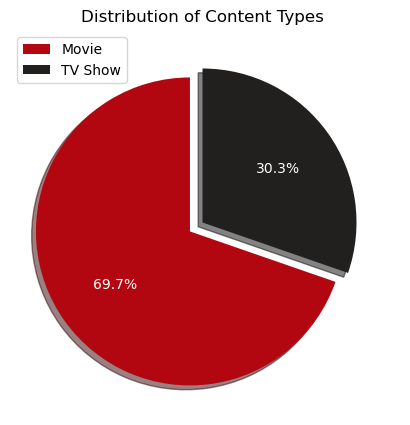

In [143]:
# Plot the 3D-effect pie chart

plt.figure(figsize=(8, 5))
colors = ['#b20710', '#221f1f']
explode = (0.1, 0)
plt.pie(mf_ratio['%'], labels=mf_ratio.index, autopct='%1.1f%%', 
colors=colors, explode=explode, shadow=True, startangle=90, 
textprops={'color': 'white'})

plt.legend(loc='upper left')
plt.title('Distribution of Content Types')
plt.show()

##### The pie chart visualization shows that approximately 70% of the content on Netflix consists of film, while the remaining 30% are TV shows.

### Country with most releases

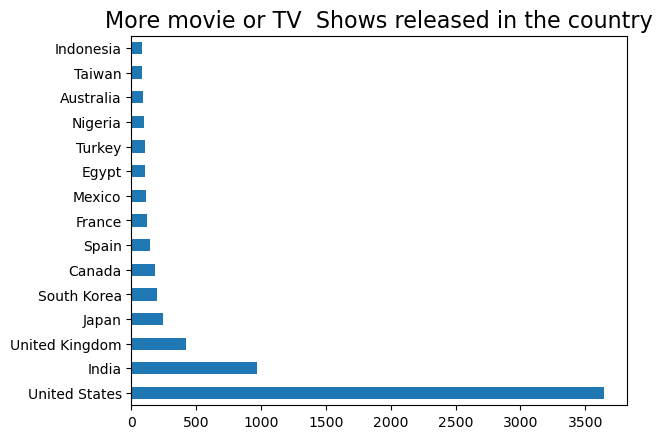

In [145]:
df.country.value_counts()[:15].plot(kind='barh')
plt.title('More movie or TV  Shows released in the country', fontsize= 16)
plt.show()

###### With the above chart, we can say that most movies are were released in United states.

###### Distribution of Movies and TV Shows Release Years

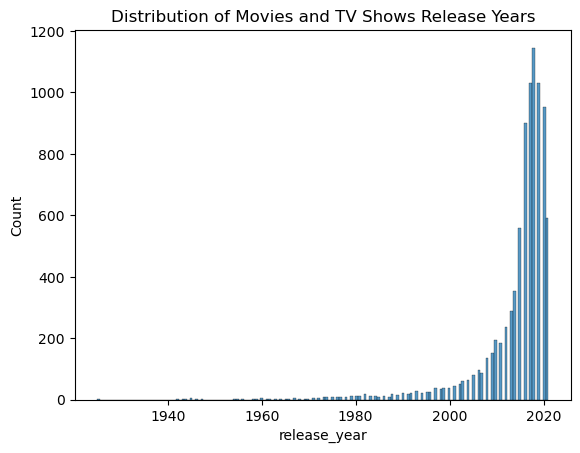

In [146]:
sns.histplot(data=df, x='release_year')
plt.title('Distribution of Movies and TV Shows Release Years')
plt.show()

###### From the above histogram, we can interpret that most movies are were released between the year 2000 to 2020.

#### Top 10 Countries Where Netflix is Popular ##

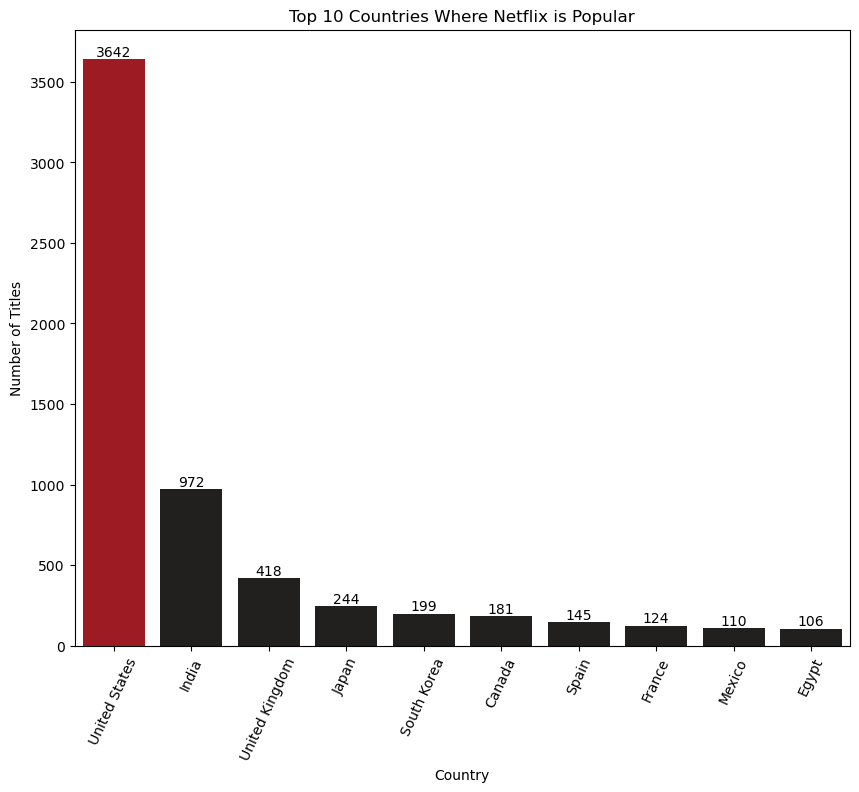

In [147]:
# Remove white spaces from 'country' column
df['country'] = df['country'].str.rstrip()

# Find value counts
country_counts = df['country'].value_counts()

# Select the top 10 countries
top_10_countries = country_counts.head(10)

## Plot the top 10 countries ##

plt.figure(figsize=(10, 8))
colors = ['#b20710'] + ['#221f1f'] * (len(top_10_countries) - 1)
bar_plot = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette=colors)

plt.xlabel('Country')
plt.xticks(rotation=65)
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Where Netflix is Popular')

# Add count values on top of each bar
for index, value in enumerate(top_10_countries.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()


###### The bar chart visualization reveals that the United States is the top country where Netflix is popular.

#### Top 10 Actors by Movie/TV Show Count

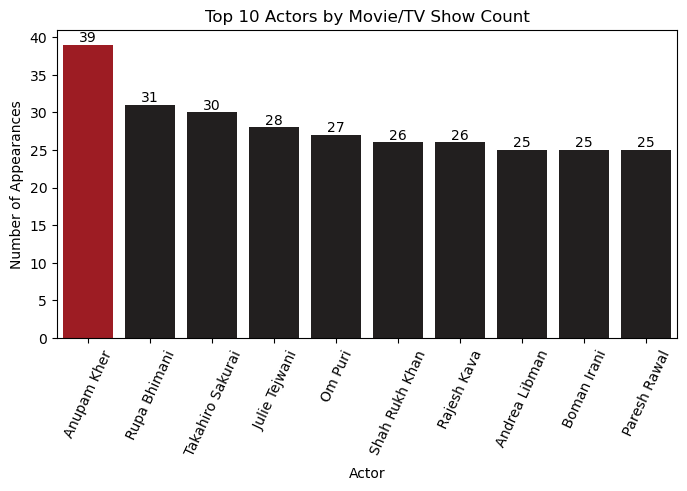

In [148]:
# Count the occurrences of each actor
cast_counts = df_cast['cast'].value_counts()[1:]

# Select the top 10 actors
top_10_cast = cast_counts.head(10)

plt.figure(figsize=(8, 4))
colors = ['#b20710'] + ['#221f1f'] * (len(top_10_cast) - 1)
bar_plot = sns.barplot(x=top_10_cast.index, y=top_10_cast.values, palette=colors)

plt.xlabel('Actor')
plt.xticks(rotation=65)
plt.ylabel('Number of Appearances')
plt.title('Top 10 Actors by Movie/TV Show Count')

# Add count values on top of each bar
for index, value in enumerate(top_10_cast.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

###### The bar chart shows that Anupam Kher has the highest appearances in movies and TV shows.

### Top 10 Directors by Movie/TV Show Count

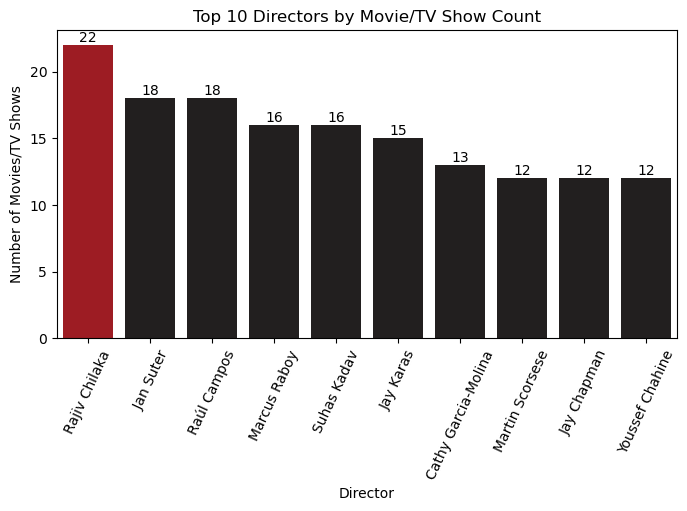

In [149]:
# Count the occurrences of each actor
director_counts = df_director['director'].value_counts()[1:]

# Select the top 10 actors
top_10_directors = director_counts.head(10)

plt.figure(figsize=(8, 4))
colors = ['#b20710'] + ['#221f1f'] * (len(top_10_directors) - 1)
bar_plot = sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette=colors)

plt.xlabel('Director')
plt.xticks(rotation=65)
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Directors by Movie/TV Show Count')

# Add count values on top of each bar
for index, value in enumerate(top_10_directors.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

###### The bar chart displays the top 10 directors with the most movies or TV shows. Rajiv Chilaka seems to have directed the most content in the Netflix library.

### Top 10 Categories by Movie/TV Show Count

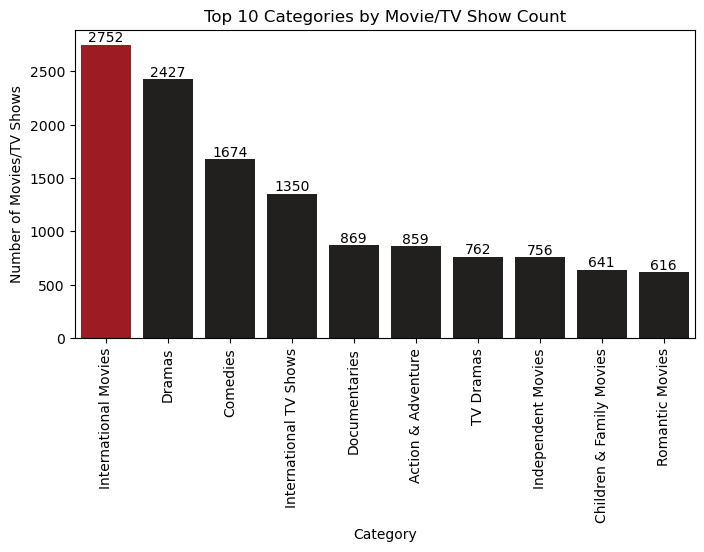

In [150]:
df_listed_in['listed_in'] = df_listed_in['listed_in'].str.strip()

# Count the occurrences of each actor
listed_in_counts = df_listed_in['listed_in'].value_counts()

# Select the top 10 actors
top_10_listed_in = listed_in_counts.head(10)

plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x=top_10_listed_in.index, y=top_10_listed_in.values, palette=colors)

# Customize the plot
plt.xlabel('Category')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Categories by Movie/TV Show Count')
plt.xticks(rotation=90)


# Add count values on top of each bar
for index, value in enumerate(top_10_listed_in.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

###### The bar chart shows the top 10 categories of movies and TV shows based on their count. “International Movies” is the most dominant category, followed by “Dramas.”

#### Movies & TV Shows Added Over Time

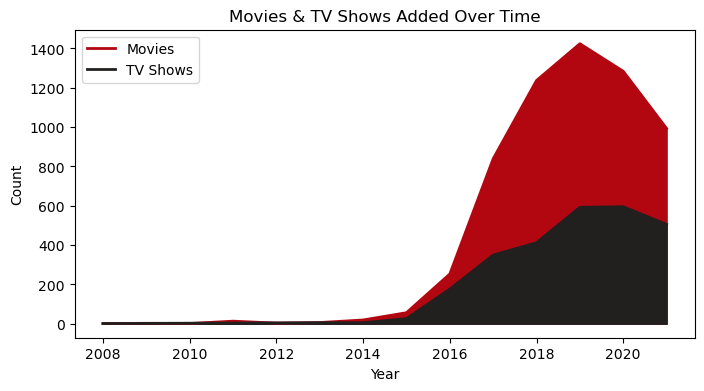

In [151]:
# Filter the DataFrame to include only Movies and TV Shows
df_movies = df[df['type'] == 'Movie']
df_tv_shows = df[df['type'] == 'TV Show']

# Group the data by year and count the number of Movies and TV Shows 
# added in each year
movies_count = df_movies['year_added'].value_counts().sort_index()
tv_shows_count = df_tv_shows['year_added'].value_counts().sort_index()

# Create a line chart to visualize the trends over time
plt.figure(figsize=(8,4 ))
plt.plot(movies_count.index, movies_count.values, color='#b20710', 
label='Movies', linewidth=2)
plt.plot(tv_shows_count.index, tv_shows_count.values, color='#221f1f', 
label='TV Shows', linewidth=2)

# Fill the area under the line charts
plt.fill_between(movies_count.index, movies_count.values, color='#b20710')
plt.fill_between(tv_shows_count.index, tv_shows_count.values, color='#221f1f')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.legend()

# Show the plot
plt.show()

###### The line chart illustrates the number of movies and TV shows added to Netflix over time. It visually represents the growth and trends in content additions, with separate lines for films and TV shows.

###### Netflix saw its real growth starting from the year 2015, & we can see it added more Movies than TV Shows over the years.

###### ## Also, it is interesting that the content addition dropped in 2020. This could be due to the pandemic situation.

### Content Added by Month

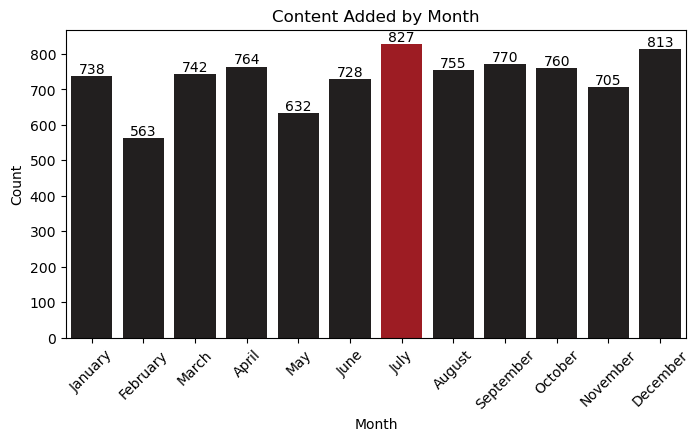

In [152]:
# Extract the month from the 'date_added' column
df['month_added'] = pd.to_datetime(df['date_added']).dt.month_name()

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Count the number of shows added in each month
monthly_counts = df['month_added'].value_counts().loc[month_order]

# Determine the maximum count
max_count = monthly_counts.max()

# Set the color for the highest bar and the rest of the bars
colors = ['#b20710' if count == max_count else '#221f1f' for count in monthly_counts]

# Create the bar chart
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette=colors)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Content Added by Month')

# Add count values on top of each bar
for index, value in enumerate(monthly_counts.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

###### The bar chart shows that July and December are the months when Netflix adds the most content to its library. This information can be valuable for viewers who want to anticipate new releases during these months.

### Distribution of Ratings

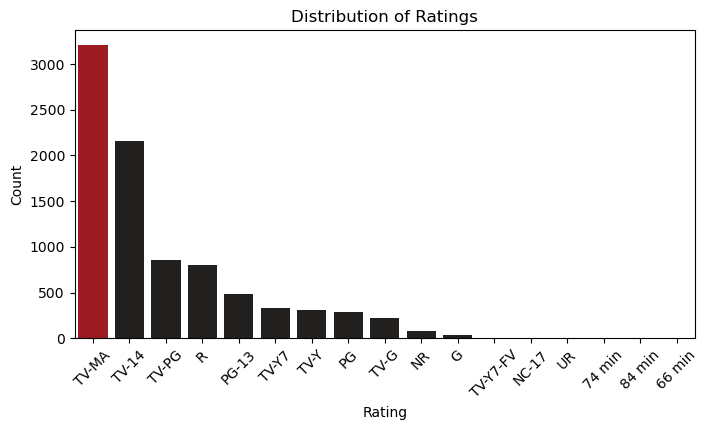

In [104]:
# Count the occurrences of each rating
rating_counts = df['rating'].value_counts()

# Create a bar chart to visualize the ratings
plt.figure(figsize=(8,4))
colors = ['#b20710'] + ['#221f1f'] * (len(rating_counts) - 1)
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors)

# Customize the plot
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

###### Upon analyzing the bar chart, we can observe the distribution of ratings on Netflix. It helps us identify the most common rating categories and their relative frequency.

### Genre Correlation Heatmap

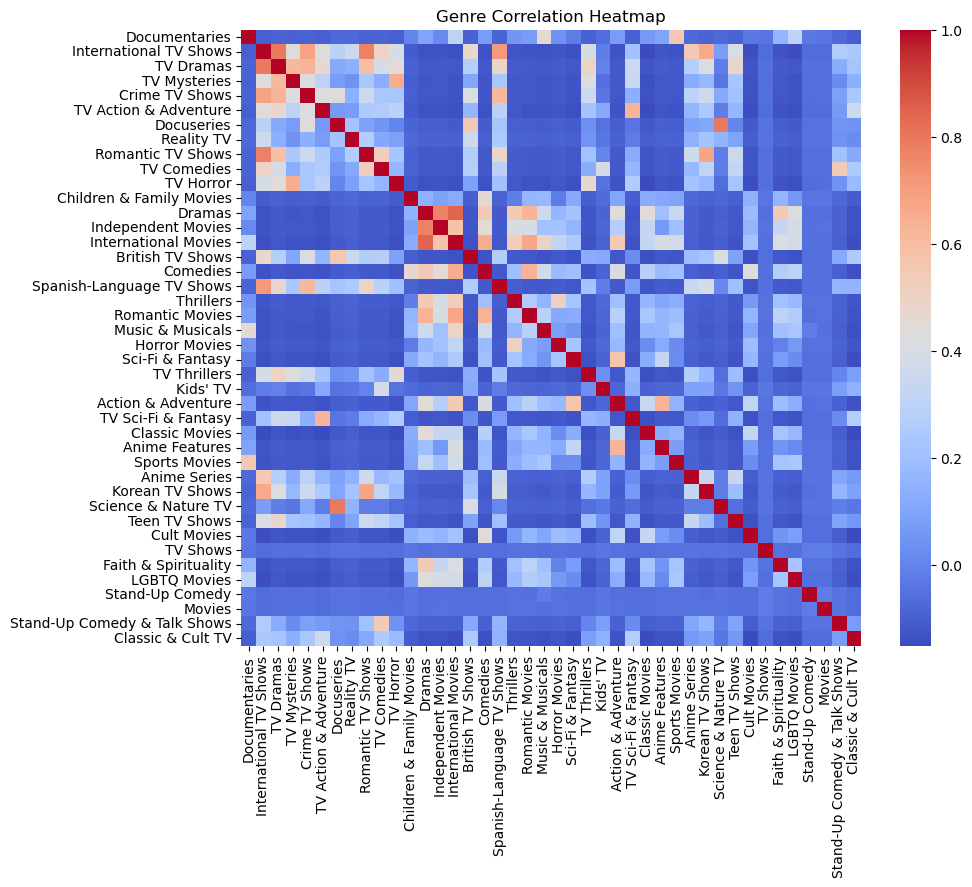

In [58]:
# Extracting unique genres from the 'listed_in' column
genres = df['listed_in'].str.split(', ', expand=True).stack().unique()

# Create a new DataFrame to store the genre data
genre_data = pd.DataFrame(index=genres, columns=genres, dtype=float)

# Fill the genre data DataFrame with zeros
genre_data.fillna(0, inplace=True)

# Iterate over each row in the original DataFrame and update the genre data DataFrame
for _, row in df.iterrows():
    listed_in = row['listed_in'].split(', ')
    for genre1 in listed_in:
        for genre2 in listed_in:
            genre_data.at[genre1, genre2] += 1
            
# Create a correlation matrix using the genre data
correlation_matrix = genre_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Customize the plot
plt.title('Genre Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

###### The heatmap demonstrates the correlation between different genres. By analyzing the heatmap, we can identify strong positive correlations between specific genres, such as TV Dramas and International TV Shows, Romantic TV Shows, and International TV Shows.

### Distribution of Movie Lengths and TV Show Episode Counts

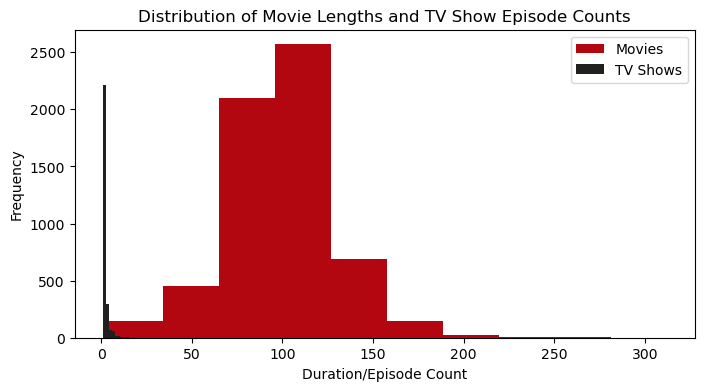

In [106]:
###### Extract the movie lengths and TV show episode counts
movie_lengths = df_movies['duration'].str.extract('(\d+)', expand=False).astype(int)
tv_show_episodes = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(int)

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.hist(movie_lengths, bins=10, color='#b20710', label='Movies')
plt.hist(tv_show_episodes, bins=10, color='#221f1f', label='TV Shows')

# Customize the plot
plt.xlabel('Duration/Episode Count')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Lengths and TV Show Episode Counts')
plt.legend()

# Show the plot
plt.show()

###### Analyzing the histograms, we can observe that most movies on Netflix have a duration of around 100 minutes. On the other hand, most TV shows on Netflix have only one season.

### The Trend of Movie/TV Show Lengths Over the Years

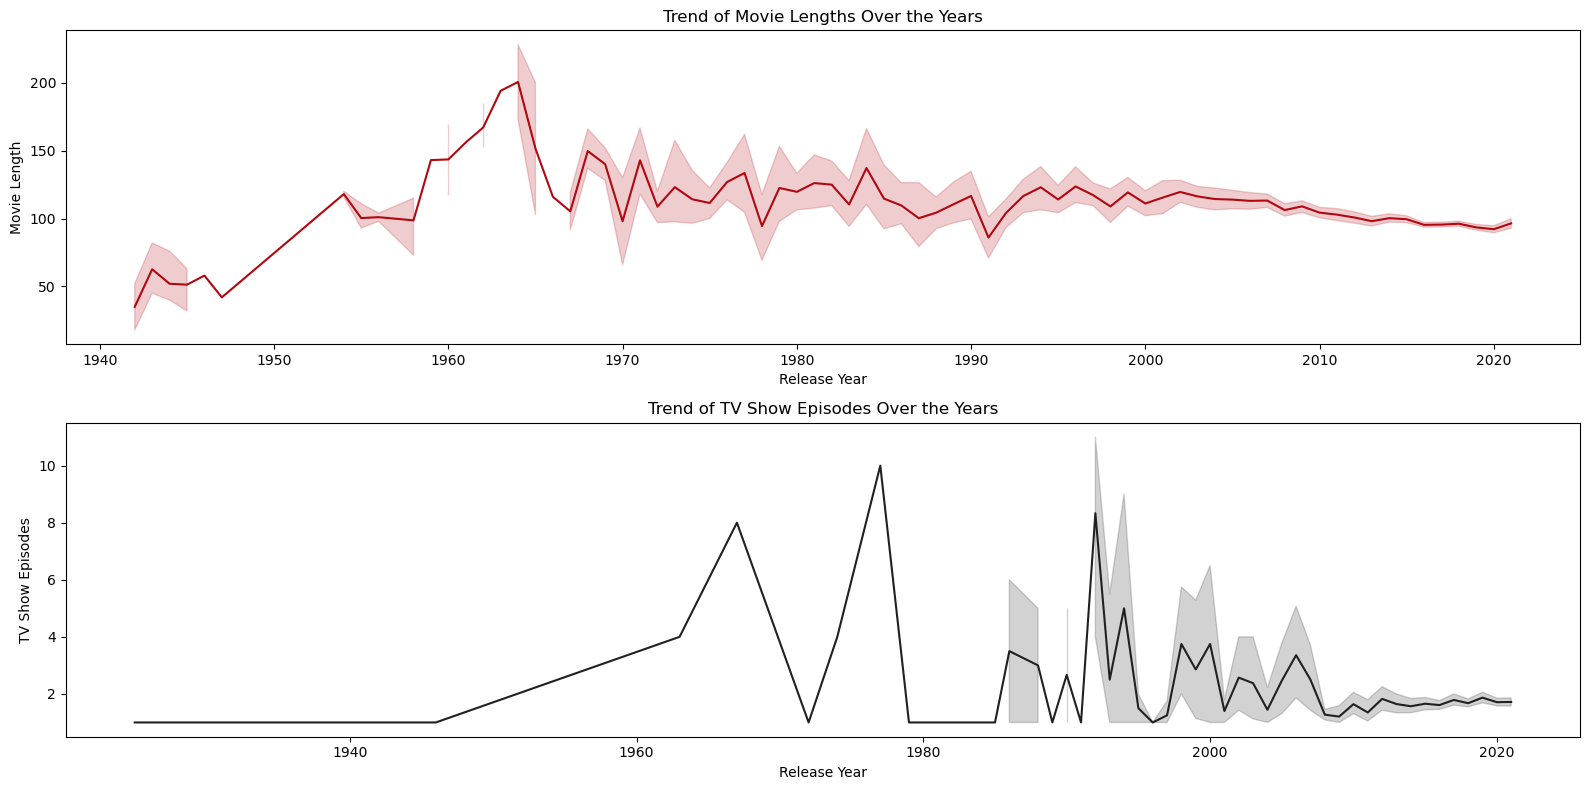

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the movie lengths and TV show episodes from the 'duration' column
movie_lengths = df_movies['duration'].str.extract('(\d+)', expand=False).astype(int)
tv_show_episodes = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(int)

# Create line plots for movie lengths and TV show episodes
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
sns.lineplot(data=df_movies, x='release_year', y=movie_lengths, color=colors[0])
plt.xlabel('Release Year')
plt.ylabel('Movie Length')
plt.title('Trend of Movie Lengths Over the Years')

plt.subplot(2, 1, 2)
sns.lineplot(data=df_tv_shows, x='release_year', y=tv_show_episodes,color=colors[1])
plt.xlabel('Release Year')
plt.ylabel('TV Show Episodes')
plt.title('Trend of TV Show Episodes Over the Years')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


###### Analyzing the line charts, we observe exciting patterns. We can see that movie length initially increased until around 1963-1964 and then gradually dropped, stabilizing around an average of 100 minutes. This suggests a shift in audience preferences over time.

###### Regarding TV show episodes, we have noticed a consistent trend since the early 2000s, where most TV shows on Netflix have one to three seasons. This indicates a preference for shorter series or limited series formats among viewers.